In [155]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from torchvision import datasets, transforms

In [156]:
# Function to apply the operation for 100 steps and plot the distribution after each 10 steps
def apply_operation(image, kernel, steps=100, plot_interval=10):
    distributions = []

    for step in range(steps):
        # Reshape the flattened image back to its original shape
        image = image.reshape((32, 32))

        # Apply convolution with padding and stride
        image = convolve2d(image, kernel, mode='same', boundary='wrap')
        
        # Apply tanh nonlinearity
        image = np.tanh(image)

        # Add random Gaussian noise of the same size
        noise = np.random.normal(0, 0.1, image.shape)  # Adjust the parameters as needed
        image += noise

        # Flatten the image for the next iteration
        image_flat = image.flatten()

        # Store the distribution after every plot_interval steps
        if (step + 1) % plot_interval == 0:
            distributions.append(image_flat)

    return distributions

Files already downloaded and verified


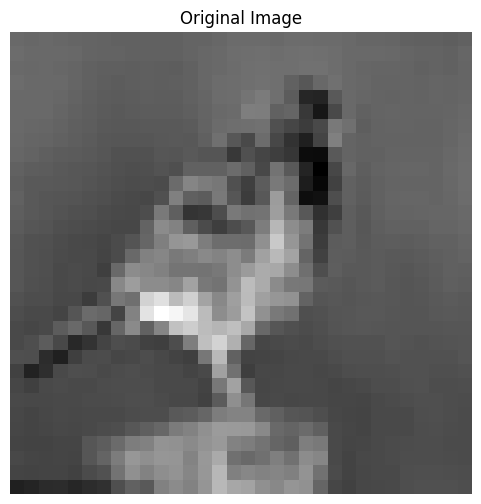

In [157]:
# Load a sample image from CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
cifar10 = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
import random

random_index = random.randint(0, len(cifar10) - 1)
image, _ = cifar10[random_index]

image = image.numpy()

# Convert the image to grayscale by taking the mean across channels
image_gray = np.mean(image, axis=0)

# Normalize and flatten the pixel values
image_flat = (image_gray - np.min(image_gray)) / (np.max(image_gray) - np.min(image_gray))
image_flat = image_flat.flatten()

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

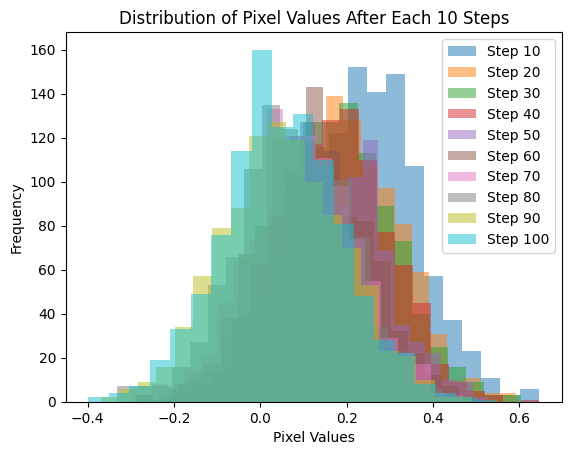

In [158]:
# Define the 3x3 kernel
kernel = np.array([[1, 1, 1],
                   [1, 8, 1],
                   [1, 1, 1]]) / 16.0
kernel[1, 1] = 0.5  # Set the center value

# Apply the operation for 100 steps and plot the distribution after each 10 steps
distributions = apply_operation(image_flat, kernel, steps=100, plot_interval=10)


# Plot the distributions separately
#for i, distribution in enumerate(distributions):
#   plt.figure(figsize=(8, 5))  # Adjust figure size as needed
#   plt.hist(distribution, bins=20, alpha=0.5, label=f'Step {10 * (i + 1)}')
#   plt.xlabel('Normalized Pixel Values')
#   plt.ylabel('Frequency')
#   plt.title(f'Distribution of Pixel Values After Step {10 * (i + 1)}')
#   plt.grid(True)  # Add grid lines for better readability
#   plt.tight_layout()  # Adjust layout to prevent overlapping elements
#   plt.show()

# Plot the distributions
for i, distribution in enumerate(distributions):
    plt.hist(distribution, bins=20, alpha=0.5, label=f'Step {10 * (i + 1)}')

plt.legend()
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values After Each 10 Steps')
plt.show()